Q1. A company conducted a survey of its employees and found that 70% of the employees use the
company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the
probability that an employee is a smoker given that he/she uses the health insurance plan?

P(Smoker | Uses Health Insurance) = P(Smoker and Uses Health Insurance) / P(Uses Health Insurance)

Given,

The probability that an employee uses the health insurance plan is 70%, which can be denoted as P(Uses Health Insurance) = 0.70.

The probability that an employee who uses the plan is a smoker is 40%, which can be denoted as P(Smoker and Uses Health Insurance) = 0.40.

Now, you can calculate the conditional probability:

P(Smoker | Uses Health Insurance) = P(Smoker and Uses Health Insurance) / P(Uses Health Insurance)
P(Smoker | Uses Health Insurance) = 0.40 / 0.70
P(Smoker | Uses Health Insurance) ≈ 0.5714

So, the probability that an employee is a smoker given that he/she uses the health insurance plan is approximately 57.14%.

Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

Q3. How does Bernoulli Naive Bayes handle missing values?

Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Q5. Assignment:
Data preparation:
Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/
datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message
is spam or not based on several input features.
Implementation:
Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the
scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the
dataset. You should use the default hyperparameters for each classifier.
Results:
Report the following performance metrics for each classifier:
Accuracy
Precision
Recall
F1 score
Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is
the case? Are there any limitations of Naive Bayes that you observed?
Conclusion:
Summarise your findings and provide some suggestions for future work.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
with open('C:\\Users\\vvinn\\Downloads\\spambase\\spambase.names','r') as file:
    nw = file.read()
print(nw)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [32]:
ne = pd.read_csv('./spambase/spambase.data',header=None)
ne

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [28]:
with open('C:\\Users\\vvinn\\Downloads\\spambase\\spambase.documentation','r') as file:
    nu = file.read()
print(nu)

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [38]:
ne.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [36]:
ne[57].value_counts()

57
0    2788
1    1813
Name: count, dtype: int64

In [40]:
x = ne.iloc[:,:-1]
y = ne[57]

In [44]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: 57, Length: 4601, dtype: int64

In [46]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [50]:
x_train.shape,x_test.shape

((3220, 57), (1381, 57))

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [58]:
# Initialize classifiers
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
gaussian_nb = GaussianNB()

In [62]:
from sklearn.model_selection import cross_val_score

In [64]:
bscore = cross_val_score(bernoulli_nb,x,y,cv=5,scoring='accuracy')
mscore = cross_val_score(multinomial_nb,x,y,cv=5,scoring='accuracy')
gscore = cross_val_score(gaussian_nb,x,y,cv=5,scoring='accuracy')

In [72]:
mean_bernoulli_accuracy = bscore.mean()
mean_multinomial_accuracy =mscore.mean()
mean_gaussian_accuracy = gscore.mean()

In [74]:
print("Bernoulli Naive Bayes Mean Accuracy:", mean_bernoulli_accuracy)
print("Multinomial Naive Bayes Mean Accuracy:", mean_multinomial_accuracy)
print("Gaussian Naive Bayes Mean Accuracy:", mean_gaussian_accuracy)

Bernoulli Naive Bayes Mean Accuracy: 0.8804564981352971
Multinomial Naive Bayes Mean Accuracy: 0.7817842137563139
Gaussian Naive Bayes Mean Accuracy: 0.8256847472029458


In [78]:
import seaborn as sns
def pf_c(xtest,ytest,model):
    y_pred= model.predict(xtest)
    print(f"Accuracy : {accuracy_score(ytest,y_pred)}")
    print(f"Classification Report: \n\n {classification_report(ytest,y_pred)}")
    print("Confusion Matrix :")
    value = confusion_matrix(ytest,y_pred)
    sns.heatmap(value,annot=True,fmt = ".1f")

In [84]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Accuracy : 0.8790731354091238
Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.93      0.90       804
           1       0.89      0.81      0.85       577

    accuracy                           0.88      1381
   macro avg       0.88      0.87      0.87      1381
weighted avg       0.88      0.88      0.88      1381

Confusion Matrix :


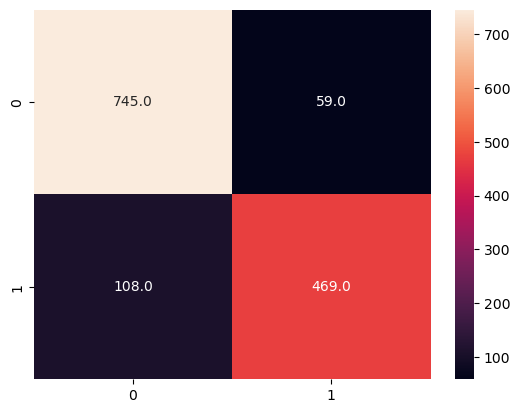

In [86]:
bernoulli_nb.fit(x_train,y_train)
pf_c(x_test,y_test,bernoulli_nb)

Accuracy : 0.782041998551774
Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.84      0.82       804
           1       0.76      0.69      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381

Confusion Matrix :


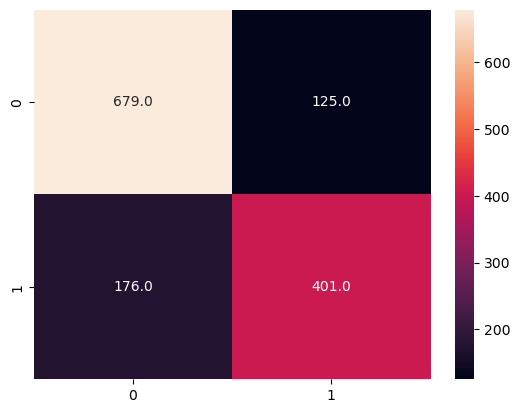

In [88]:
multinomial_nb.fit(x_train,y_train)
pf_c(x_test,y_test,multinomial_nb)

Accuracy : 0.8247646632874729
Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381

Confusion Matrix :


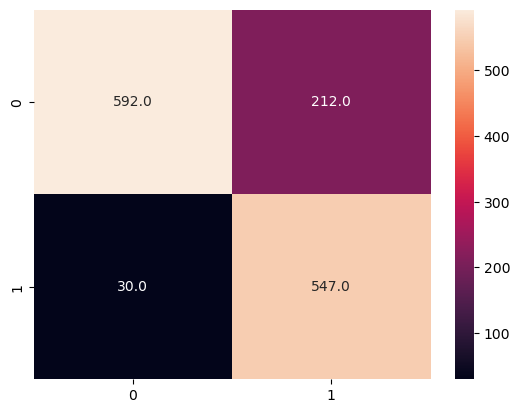

In [92]:
gaussian_nb.fit(x_train,y_train)
pf_c(x_test,y_test,gaussian_nb)